<font size=5 color="blue"><b><center> Business Statistics:  EDA & Insurance claims</center></b></font><br>

**Objective – Explore the dataset and extract insights from the data. Using statistical evidence to**
- Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 
- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- Is the proportion of smokers significantly different across different regions? 
- Is the mean BMI of women with no children, one child, and two children the same?<br>

<br>

# Context
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. 

# Data Set 
- Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex :- This is the policy holder's gender, either male or female.
- BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
- Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges​ :- Individual medical costs billed to health insurance

# Question to be answered
- Are there more Male beneficary ?
- Are there more smoker ?
- Which region has maximum , medical cost billed to health insurance.?
- What is age of beneficary.?
- Do beneficary having more dependents had more medical cost billed.?
- 

# Libraries


In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq 


# Read and Understand Data

In [2]:
#Reading the csv file AxisInsurance.csv 
data_path='csv_files/insurance.csv'
df=pd.read_csv(data_path)
insured=df.copy()
print(df)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [3]:
# inspect data, print top 5 
insured.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
# bottom 5 rows:
insured.tail(5)

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
insured.shape

(1338, 7)

In [6]:
# list(insured.columns)
insured.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

In [7]:
insured.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
insured.isnull().sum().values.sum()

0

In [9]:
insured.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [10]:
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])

print ("\nFeatures : \n", insured.columns.tolist())

print ("\nMissing values :  ", insured.isnull().sum().values.sum())
print ("\nUnique values :  \n", insured.nunique())


Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


In [11]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [13]:
insured.sex


0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

**Types of variables**

- Categorical varibles - sex,smoker,region,children
-  Quantitative variables -age,bmi,charges. Here children is a discrete variable where as age, bmi, and charges are continous variables.

- There are no missing values

In [14]:
#changing object dtype to category  to save memory
insured.sex=insured['sex'].astype("category")
insured.smoker=insured['smoker'].astype("category")
insured.region=insured['region'].astype("category")


In [15]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [16]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


**Observations**
 - Average age of the primary beneficiary is 39.2 and maximum age is 64.
 - Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13
 - Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770
 - Median is less than mean in charges , indicating distrubution is postively skewed .
 - Customer on an average has 1 child.
 - For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted 
 
    

In [17]:
#Are there more Male beneficary ?
# Are there more smoker ?
# which region has maximum , claims .?

insured.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [18]:
print(insured.select_dtypes(['category']).columns)


Index(['sex', 'smoker', 'region'], dtype='object')


In [19]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())


male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


**Observations**
 - 676 male and 662 female, indicated sample has  slightly more males than females. 
 - 1064 nonsomker and 274 smoker, indicating sample has more nonsmokers.
 - Number of  claims from customer who reside in southwest region is more compared to other regions


# Exploratory Data Analysis

## Univariate Analysis

In [20]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    print('mean',mean)
    print('median',median)
    print("mode",mode)
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
   

In [21]:
list_col=  insured.select_dtypes([np.number]).columns
list_col

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

mean 39.20702541106129
median 39.0
mode 18


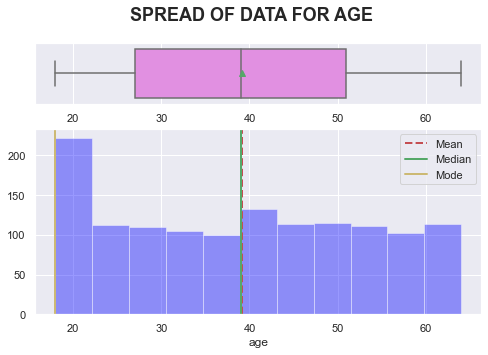

In [22]:
dist_box(insured[list_col[0]])

mean 39.20702541106129
median 39.0
mode 18
mean 30.665470852017993
median 30.4
mode 27.6
mean 1.0949177877429
median 1.0
mode 0
mean 13270.422414050803
median 9382.029999999999
mode 1639.56


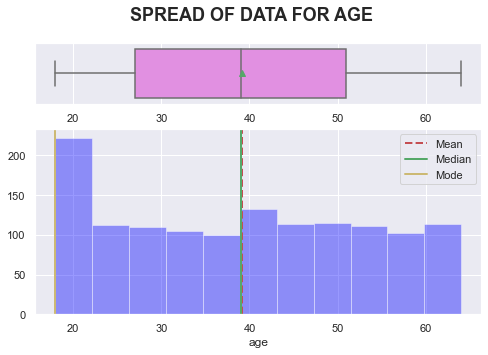

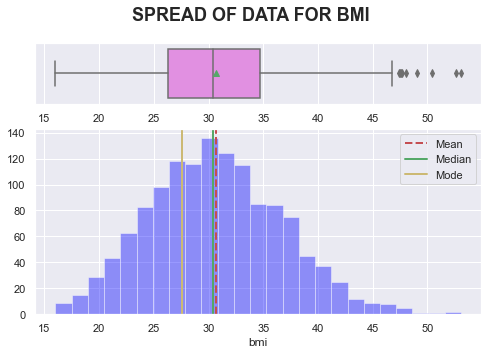

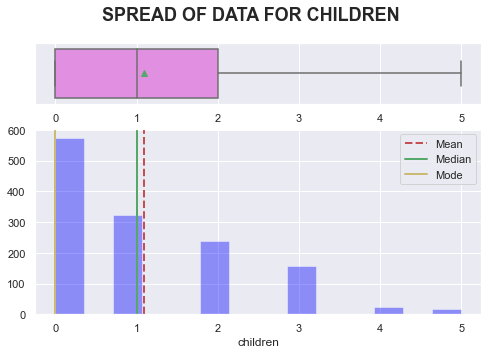

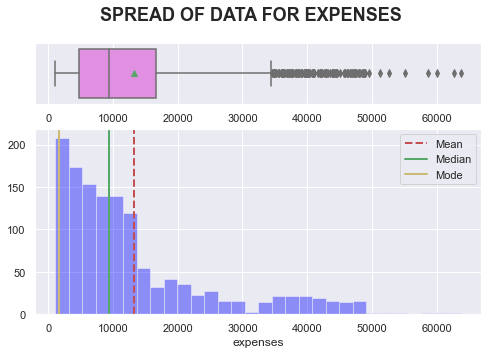

In [23]:
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(insured[list_col[i]])
    

**Observations**
- Age of primary beneficary lies approximately between 20 - 65 . Average Age is aprrox. 40. Majority of customer are in range 18- 20's.
- Bmi is normally distrubuted and Average BMI of beneficiary is 30.This BMI is outside the normal range of BMI. There are lot of outliers at upper end
- Most of the beneficary have no childrens.
- Charges distrubution is unimodal and is right skewed .Average cost incured to the insurance is appro. 130000 and highest charge is 63770.There are lot of outliers at upper end.

In [24]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
    

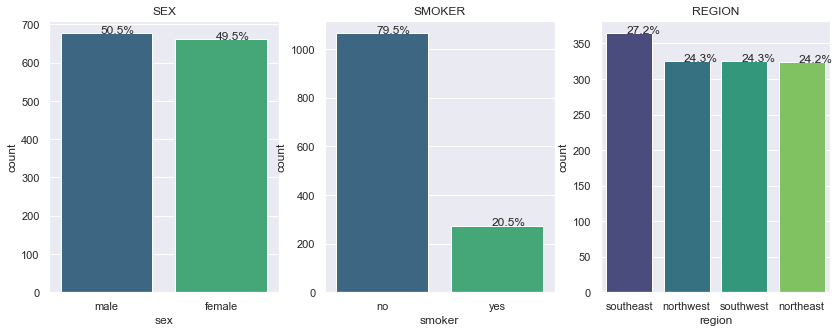

In [25]:
#get all category datatype 
list_col=  insured.select_dtypes(['category']).columns
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range(len(list_col)):
    order = insured[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=insured , order=order,ax=axes1[i],palette='viridis').set(title=list_col[i].upper())
    bar_perc(axes1[i],insured[list_col[i]])

**Observations**
 - 50.5% of beneficiary are male and 49.5 % are female. Approximately same number of male and female beneficiary.
 - 20.5% of beneficary are smokers.
 - Beneficary are evenly distributed across regions with South East being the most populous one (~27%) with the rest of regions each containing around ~24% 
 - Most of the beneficiary don't have kid.

## Bivariate & Multivariate Analysis

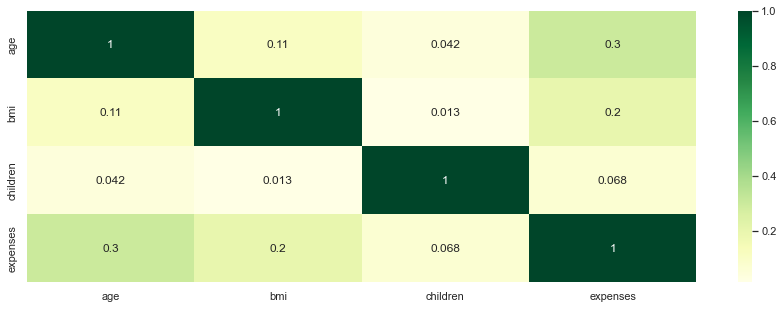

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(insured.corr(),annot=True ,cmap="YlGn")
plt.show()

In [27]:
cat_columns=insured.select_dtypes(['category']).columns
cat_columns

Index(['sex', 'smoker', 'region'], dtype='object')

**Observation**
 - There is  very little significant correlation between charges &age and charges and bmi.


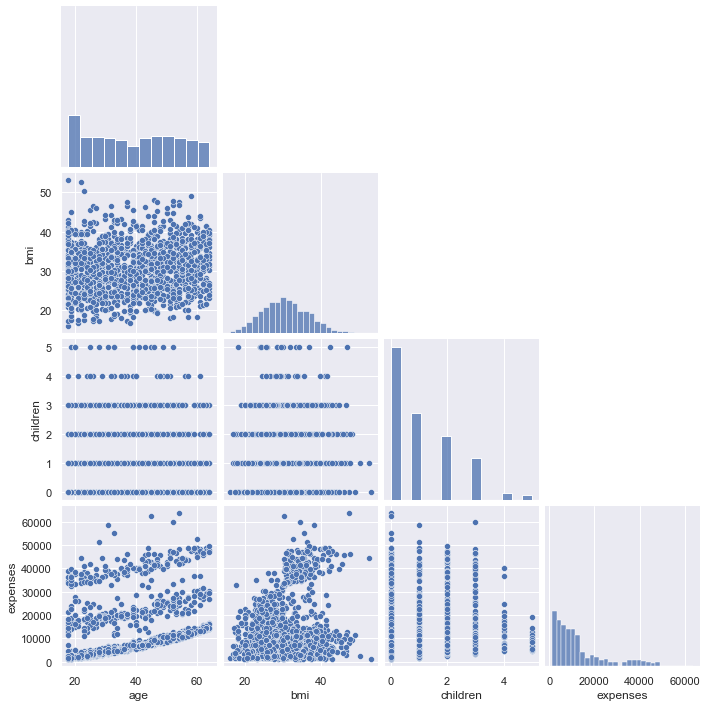

In [28]:
sns.pairplot(data=insured , corner=True)
plt.show()

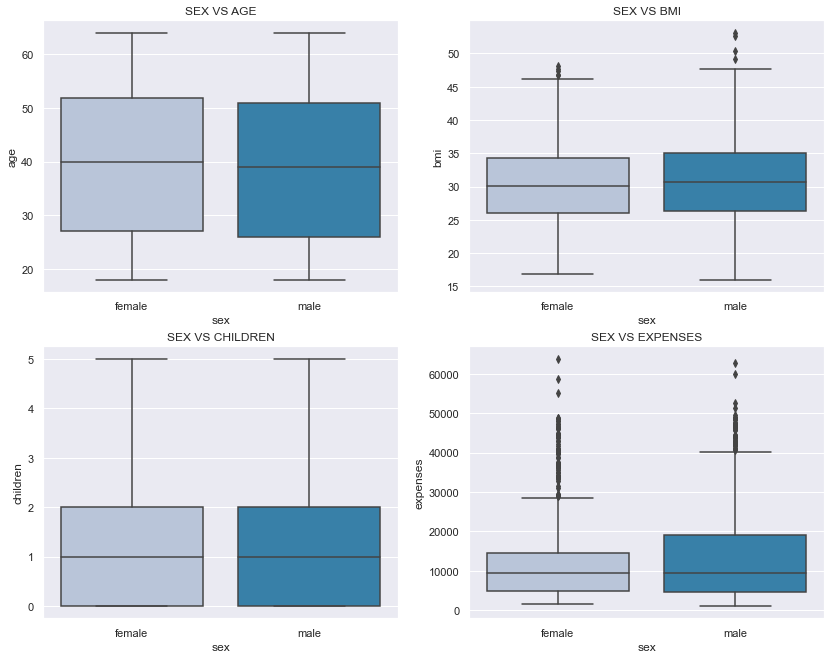

In [29]:
#Sex vs all numerical variable
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=insured[list_col[i]],x=insured['sex'],ax=ax,palette="PuBu", orient='v').set(title='SEX VS '+ list_col[i].upper())
    
    

**Observation**
 - Avergae Age of female beneficiary is slightly higher than male beneficiary
 - No of children both male and female beneficary have is same
 - BMI of Male policy holder has many outliers and Average BMI of male is slightly higher than female
 - Male policy holder has incure more charges to insurance compared to female policy holder. There are lot of outliers in female policy holder

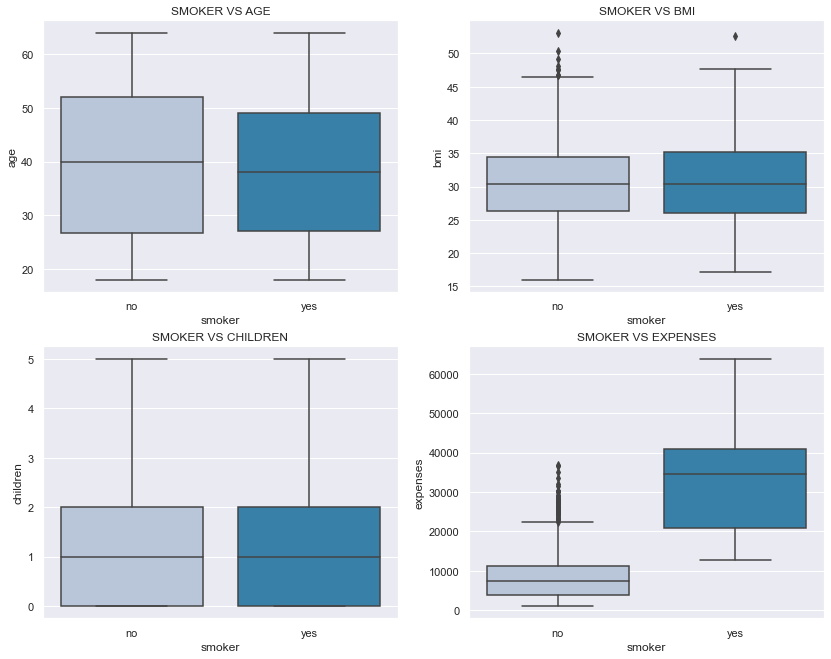

In [30]:
#smoker vs all numerical variables
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=insured[list_col[i]],x=insured['smoker'],ax=ax,palette="PuBu",orient='v').set(title='SMOKER VS '+ list_col[i].upper()  )
    

**Observation**
- Smoker have incured more cost to insurance than nonsmoker. There are outliers in nonsmoker , need to analyze.
- BMI of non smoker has lot of outliers.

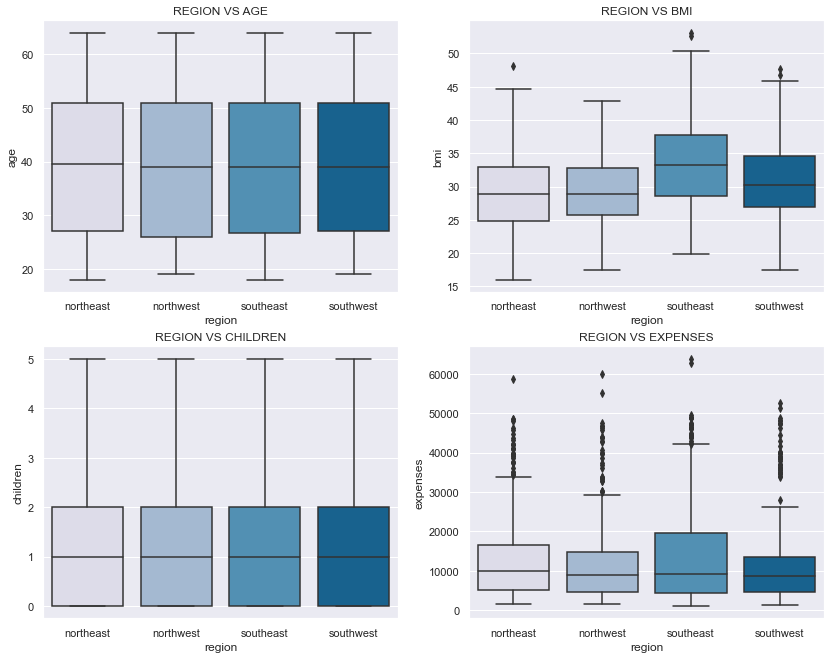

In [31]:
#region vs all numerical variable
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the outliers
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=insured[list_col[i]],x=insured['region'],ax=ax,palette="PuBu",orient='v').set(title='REGION VS '+ list_col[i].upper()  )
    

**Observations**
 - Age  and numnber of children across regions is almost same.
 - Average Bmi of policy holder from southeast higher compared to other regions
 - Charges incured because of policy holder from southeast is higher compared to othe regions
 - There are lot of outliers on upper end in charges


[Text(0.5, 1.0, 'Smoker vs Sex')]

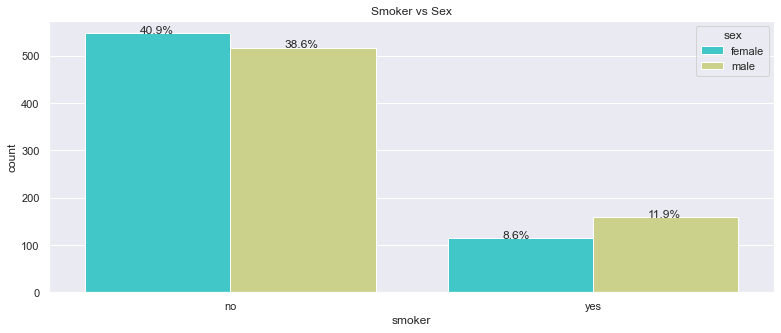

In [32]:
#smoker vs Sex
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=insured,palette='rainbow')
bar_perc(ax,insured['sex'])
ax.set(title="Smoker vs Sex")

[Text(0.5, 1.0, 'Smoker vs expenses')]

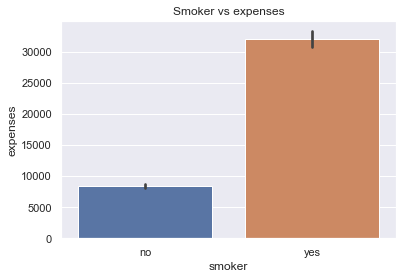

In [33]:
#smoker vs expenses
sns.barplot(x=insured.smoker,y=insured.expenses).set(title="Smoker vs expenses")

[Text(0.5, 1.0, 'Smoker vs Region')]

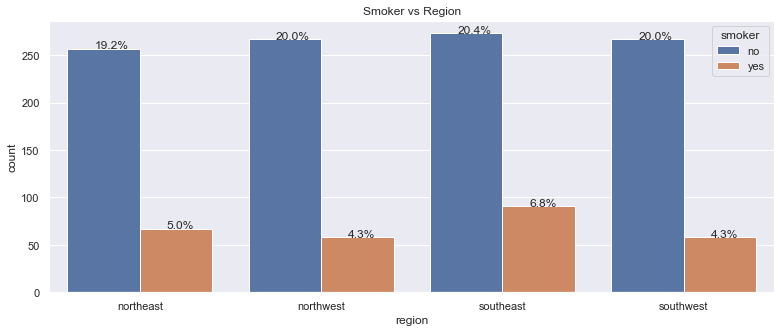

In [34]:
#region vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
bar_perc(ax,insured['smoker'])
ax.set(title="Smoker vs Region")

**Observation**
- There are more male smokers than female.
- Southeast region has more smokers
- Smoker have more costlier claims than nonsmoker.

[Text(0.5, 1.0, 'Sex vs Region')]

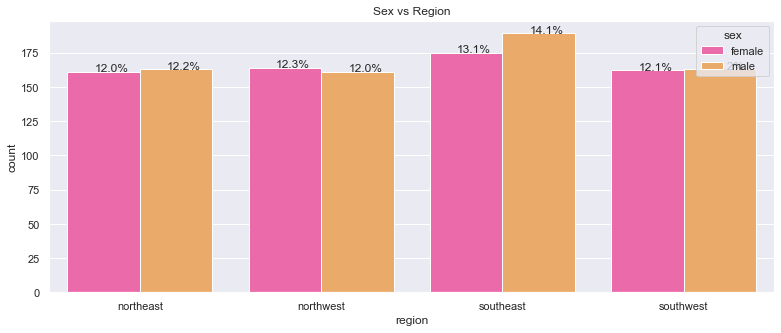

In [35]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=insured,palette='spring')
bar_perc(ax,insured['sex'])
ax.set(title="Sex vs Region")

**Observations**
 - There are more smokers in southeast region compared to other regions.

In [36]:
insured.groupby(insured.sex).expenses.mean()

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

[Text(0.5, 1.0, 'Children vs Charges')]

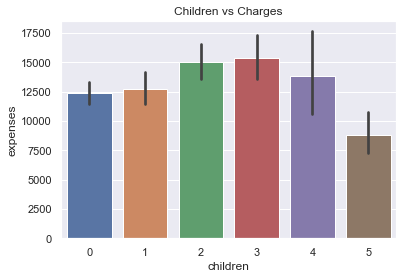

In [37]:
sns.barplot(x=insured.children,y=insured.expenses).set(title="Children vs Charges")

[Text(0.5, 1.0, 'Sex Vs expenses')]

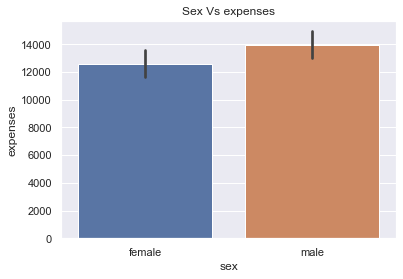

In [38]:
sns.barplot(x=insured.sex,y=insured.expenses).set(title='Sex Vs expenses')

[Text(0.5, 1.0, 'Region Vs expenses')]

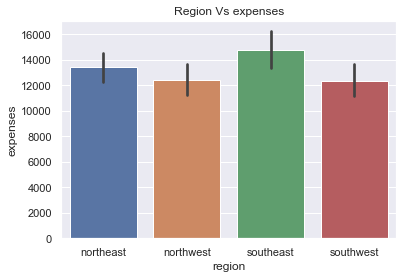

In [39]:
sns.barplot(x='region',y='expenses',data=insured).set(title='Region Vs expenses')

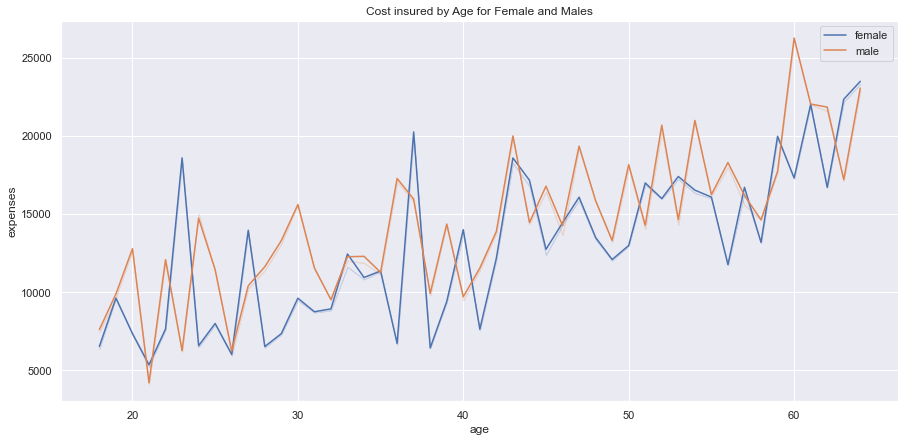

In [40]:
plt.figure(figsize=(15,7))
sns.lineplot(insured["age"],insured["expenses"],hue=insured["sex"],ci=0).set(title= 'Cost insured by Age for Female and Males')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

**Observations**
 - Charges incurred for males are more than charges incured for females
 - With increasing age of policy holder charges incured are going high for both male and female.
 - There some spikes for female at an approximate ages of 23,28,43.
 - Most claims are from southeast regions.
 - Males who smoke have most claims and have higher bills 
 - Number of claims made by female who dont smoke is more compared to female who smoke.
 
 


In [41]:
#creating groups of bmi
category=pd.cut(insured.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
insured.insert(5,'BMIGroup',category)


In [42]:
insured.head()

,age,sex,bmi,children,smoker,BMIGroup,region,expenses
0,19,female,27.9,0,yes,25-35,southwest,16884.92
1,18,male,33.8,1,no,25-35,southeast,1725.55
2,28,male,33.0,3,no,25-35,southeast,4449.46
3,33,male,22.7,0,no,15-25,northwest,21984.47
4,32,male,28.9,0,no,25-35,northwest,3866.86


In [43]:
#no of children has no relation with charges
insured.groupby(insured.children).expenses.mean()

children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64

In [44]:
insured.groupby(insured.BMIGroup).expenses.mean()

BMIGroup
15-25    10284.290121
25-35    12720.254413
35-45    16913.681791
45-55    17547.927500
Name: expenses, dtype: float64

In [46]:
category1=pd.cut(insured.age,bins=[8,18,28,38,48,58,68],labels=['8-18','18-28','28-38','38-48','48-58','58-68'])
insured.insert(7,'AgeBin',category1)

In [47]:
insured

,age,sex,bmi,children,smoker,BMIGroup,region,AgeBin,expenses
0,19,female,27.9,0,yes,25-35,southwest,18-28,16884.92
1,18,male,33.8,1,no,25-35,southeast,8-18,1725.55
2,28,male,33.0,3,no,25-35,southeast,18-28,4449.46
3,33,male,22.7,0,no,15-25,northwest,28-38,21984.47
4,32,male,28.9,0,no,25-35,northwest,28-38,3866.86
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,25-35,northwest,48-58,10600.55
1334,18,female,31.9,0,no,25-35,northeast,8-18,2205.98
1335,18,female,36.9,0,no,35-45,southeast,8-18,1629.83
1336,21,female,25.8,0,no,25-35,southwest,18-28,2007.95


In [48]:
insured.groupby(insured.AgeBin).expenses.mean()

AgeBin
8-18      7086.217971
18-28     9528.142866
28-38    11598.555097
38-48    14334.586014
48-58    15887.954489
58-68    20824.973022
Name: expenses, dtype: float64

In [51]:
insured.groupby(['region','sex','smoker']).mean()['expenses'] #.unstack()

region     sex     smoker
northeast  female  no         9640.427121
                   yes       28032.045517
           male    no         8664.042640
                   yes       30926.252895
northwest  female  no         8786.998519
                   yes       29670.824828
           male    no         8320.689167
                   yes       30713.180690
southeast  female  no         8440.205396
                   yes       33034.821389
           male    no         7609.003731
                   yes       36029.839636
southwest  female  no         8234.091702
                   yes       31687.988571
           male    no         7778.906111
                   yes       32598.863784
Name: expenses, dtype: float64

[Text(0.5, 1.0, 'Age Vs expenses')]

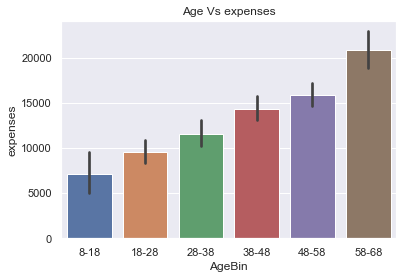

In [50]:
sns.barplot(x=insured.AgeBin,y=insured.expenses).set(title='Age Vs expenses')

<AxesSubplot:xlabel='BMIGroup', ylabel='expenses'>

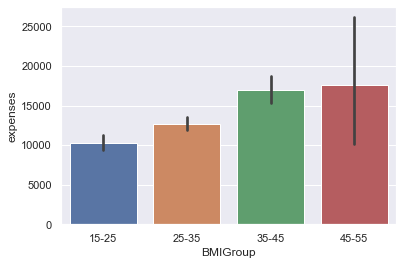

In [52]:
sns.barplot(x=insured.BMIGroup,y=insured.expenses)

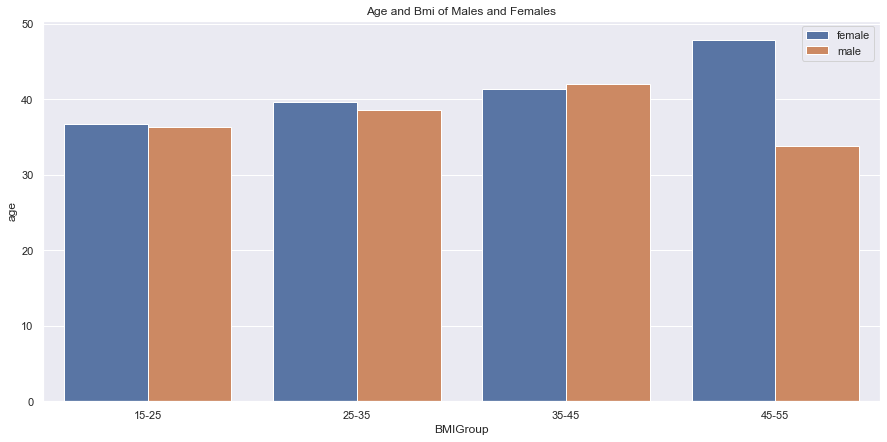

In [53]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["BMIGroup"],y=insured["age"],hue=insured['sex'],ci=0).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Fig 2:BMI group and expenses ')]

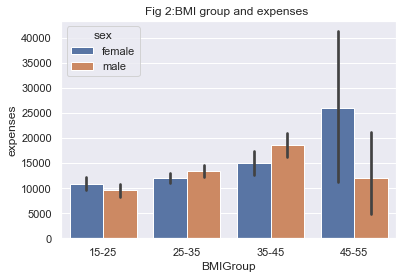

In [55]:
sns.barplot(x='BMIGroup',y='expenses',hue='sex',data=insured).set(title="Fig 2:BMI group and expenses " )

**Observations**
- FeMales with most BMI has incured most charges to the insurance company
- BMI for male and females are not same
- Beneficary with higher BMI have incurred more cost to insurance.

In [58]:
pd.crosstab(insured['sex'],insured['children'])

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


<Figure size 1800x720 with 0 Axes>

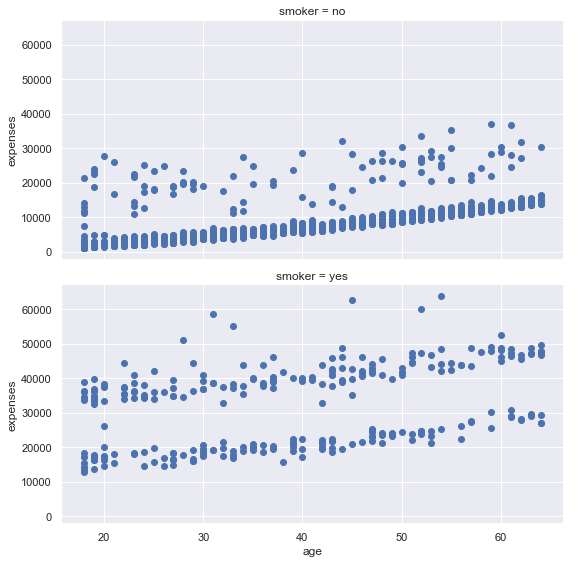

In [59]:
plt.figure(figsize=(25,10))
g=sns.FacetGrid(insured,row='smoker',height=4, aspect=2)
g=(g.map(plt.scatter ,'age','expenses').add_legend())

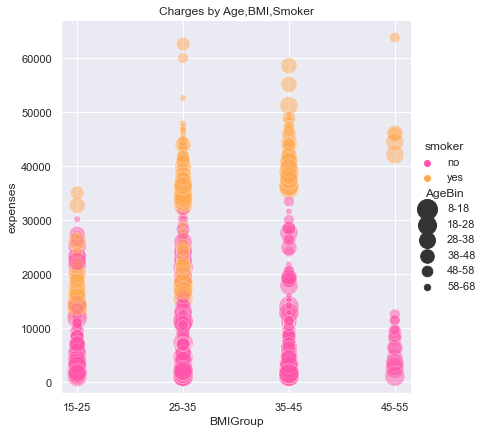

In [61]:
sns.relplot(x=insured.BMIGroup, y=insured.expenses, hue=insured.smoker, size= insured.AgeBin,
            sizes=(40, 400), alpha=.5, palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');

**Observation**
- Males who smoker have incured more cost compared to nonsmokers.
- As age increased claims increased
-Smoker have higher medical claims

# Conclusion based on EDA
- As expected , as the age of the beneficiary  increases ,the cost to insurance increases.
- Males who smoke have most claims and have higher bills.
- Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.
- Beneficiary with 2 or 3 dependent  have billed higher compared to others people who have 5.This is unusual and may be because of  uneven number of observations in each group. For example, no dependents group has 574 observations whereas five dependents group only has 18.
- Customer with bmi  >30 are  on higher side of obesity, have more health issues and have higher claims.
- Females with BMI more than 45 have billed higher to insurance.
- Age, BMI and Smoking are important attributes which can cost insurance company more.


# Statistical Analysis

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  :  \mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers 
 <br>
 

$\ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify the test</b></font>

Standard deviation of the population is not known  ,will perform a T stat test .  The > sign in alternate hypothesis indicate  test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of  sampling  distribution curve.

    


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

In [ ]:
smoker.count()

In [ ]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

In [ ]:
nonsmoker.count()

In [ ]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[-274:]
charges_yes = smoker.charges
charges_no = nonsmoker.charges

In [ ]:
print('Average Cost charged to Insurance for smoker is {} and nonsmoker is {} '.format(charges_yes.mean(),charges_no.mean()))


In [ ]:
#smoker vs charges
sns.boxplot(x=insured.charges,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [ ]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))


In [ ]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whethere to  reject or failed to reject null hypothesis</b></font><br>    
    We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

<div class ="alert alert-block alert-info">
    Let $\mu_1 \mu_2 $ and be the respective population means for BMI of males and BMI of females<br>
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  : \mu_1 - \mu_2 = 0$ There is no difference between the BMI of Male  and BMI of female.<br>
$\ H_a  : \mu_1 - \mu_2 !=0 $ There is difference between the BMI of Male and BMI of female. <br>


</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3:Identify the test</b></font><br>Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]


In [ ]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

In [ ]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)


In [ ]:
df_female.bmi.mean()

In [ ]:
df_male.bmi.mean()

In [ ]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

In [ ]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male. 

# 3.Is the proportion of smokers significantly different across different regions?

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypotheses</b></font>

* H<sub>0</sub> Smokers proportions is not significantly different across different regions
* H<sub>a</sub> Smokers proportions is  different across different regions  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify Test</b></font><br>
    Here we are comparing two different categorical variables, smoker and  different region. So perform a  Chi-sq Test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
contigency= pd.crosstab(insured.region, insured.smoker)
contigency

In [ ]:
 contigency.plot(kind='bar')

In [ ]:
# Using the chi2_contingency test 
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

In [ ]:
if (pval < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions.
    


# 4.Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypotheses</b></font>

* H<sub>0</sub>: μ1 = μ2 = μ3  The mean BMI of women with no children , one child,two children is same <br>

* H<sub>a</sub>:  Atleast  one of mean BMI of women is not same <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify Test</b></font><br>
    
One-way ANOVA - Equality of population through variances of samples.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
# Filtering data of only women with 0, 1 and 2 children
df_female_child = df_female.loc[df_female['children']<=2]
df_female_child.head()

In [ ]:
#pd.pivot_table(data=df_female_filtered,index=df_female_filtered.children,columns=df_female_filtered.bmi,values=df_female_filtered.bmi,fill_value=0)
df_female_child.groupby([df_female_child.children]).mean().bmi

In [ ]:
# Women BMI with children 0, 1, 2;
sns.boxplot(x="children", y="bmi", data=df_female_child)
plt.grid()
plt.show()

In [ ]:

# Applying ANOVA and cheking each children count (0,1,2) with the bmi;
formula = 'bmi ~ C(children)'
model = ols(formula, df_female_child).fit()
aov_table = anova_lm(model)
aov_table

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     P value is 0.715858 and it is greater than aplha(0.05) ,We failed to  reject the null hypothesis and conclude that mean Bmi of women  with no children,one children, two children is same. 
    

### Recommendation
- Based on EDA and statistical  evidence it can be seen that  customer who smoke or   have higher  BMI  have more higher claims. We can encourage customers to quit smoking by providing them  incentive points  for talking to life coach, get help for improving lifestyle habits,  Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
- We can have Active wellness programs which can help up reduce claims related to BMI.
- High BMI  is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
- Provide discount coupons  for Gym  or  fitness devices encouraging customers to exercise.
